In [46]:
#Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_excel('champagne_new.xlsx', index_col=0)
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [6]:
data.columns = ['Sale']
data.head()

,Sale
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


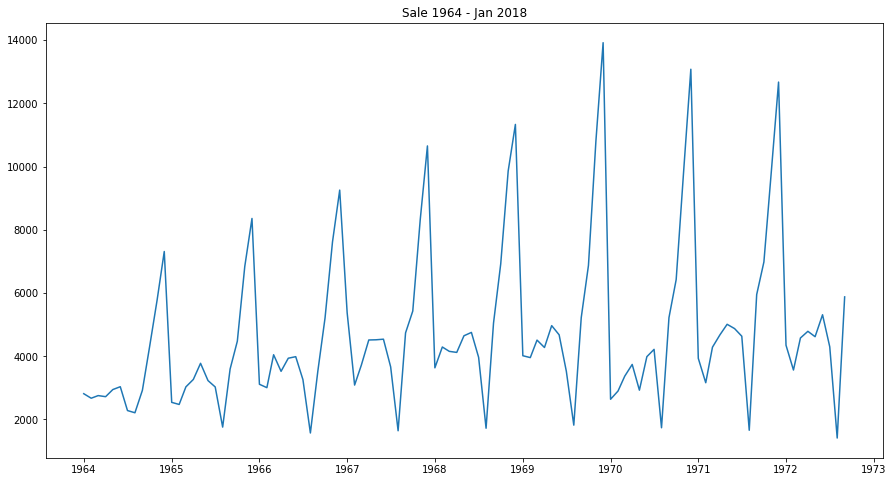

In [7]:
plt.figure(figsize= (15,8))
plt.plot(data)
plt.title("Sale 1964 - Jan 2018")
plt.show()

Nhận xét: Lượng sale tăng từ năm 1964 đến năm 1970, sau đó bắt đầu giảm xuống

In [8]:
type(data)

pandas.core.frame.DataFrame

## Decomositon

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(x = data, model= 'multiplicative')
result 

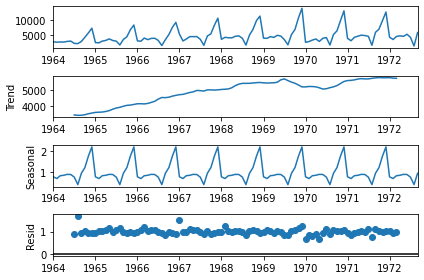

In [10]:
result.plot()
plt.show()

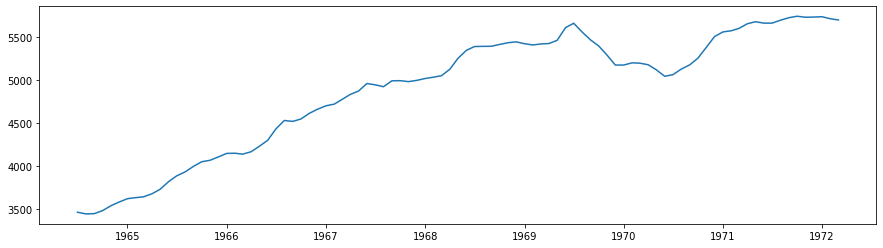

In [11]:
plt.figure(figsize=(15,4))
plt.plot(result.trend)
plt.show()

Nhận xét: Trend: tăng từ 1965 giữa cuối năm 1969 sau đó giảm đến giữa cuối năm 1970 rồi tăng dần đến giữa cuối năm 1971 rồi đi ngang

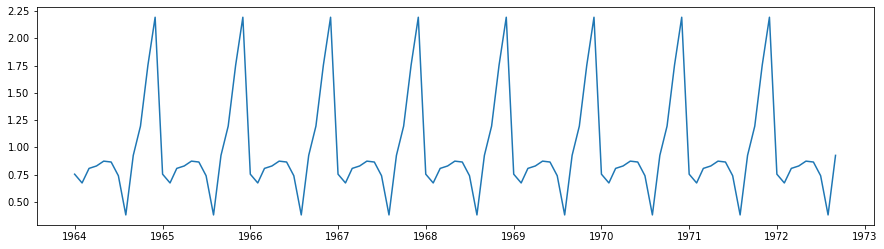

In [12]:
plt.figure(figsize=(15,4))
plt.plot(result.seasonal)
plt.show()

Nhận xét: Seasonal - có phụ thuocj theo mùa, từ chart có thể thấy chu kỳ lặp lại

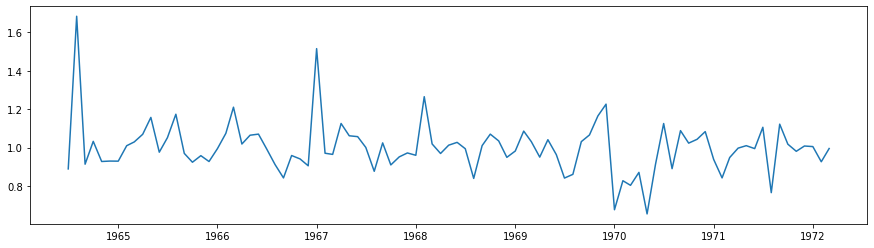

In [13]:
plt.figure(figsize=(15,4))
plt.plot(result.resid)
plt.show()

Nhận xét: Residua biến động từ 0-8-1.6, chủ yếu range xung quang 1-1.2

## Sử dụng phương pháp Arima để build model

In [14]:
from pmdarima import auto_arima

In [15]:
stepwise_model = auto_arima(data, start_p=2, start_q=2,
                           max_p=5, max_q=5, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.34 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1491.853, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1491.669, Time=0.52 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1491.700, Time=1.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.36 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1491.649, Time=0.89 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.55 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.19 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=3.02 sec
 ARIMA(1,1,1)(1,1,1)[12]     

In [16]:
print(stepwise_model.aic())

1485.190496719603


In [17]:
train = data.loc['1964-01-01':'1969-02-01']
test = data.loc['1969-02-01':]

In [18]:
train.head()

,Sale
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [19]:
test.head()

,Sale
Month,
1969-02-01,3957
1969-03-01,4510
1969-04-01,4276
1969-05-01,4968
1969-06-01,4677


In [20]:
len(test)

44

In [21]:
len(train)

62

In [22]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [23]:
future_forecast = stepwise_model.predict(n_periods=len(test))
future_forecast 

array([ 4604.92658245,  4739.92870562,  5198.82184737,  5293.21632259,
        4493.15784418,  2281.6491067 ,  5575.19882072,  7286.45301067,
       10215.58609937, 11807.24634567,  4533.03580531,  4572.64466733,
        5112.63346994,  5224.56247587,  5692.67195595,  5788.66031361,
        4990.2579255 ,  2774.56157144,  6072.43061264,  7806.036027  ,
       10736.11220527, 12311.47586124,  5031.66336796,  5057.72946164,
        5612.54224982,  5727.64007724,  6194.48380157,  6290.2532582 ,
        5491.62342556,  3276.50219142,  6573.77802379,  8304.31376016,
       11234.26041615, 12811.86221729,  5532.81908641,  5560.74512016,
        6113.52200814,  6228.18463517,  6695.20219617,  6791.00171629,
        5992.40312048,  3777.20290038,  7074.56020301,  8805.51752357])

In [24]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns= ['Prediction'])

In [35]:
future_forecast.tail()

,Prediction
Month,
1972-05-01,6791.001716
1972-06-01,5992.403120
1972-07-01,3777.202900
1972-08-01,7074.560203
1972-09-01,8805.517524


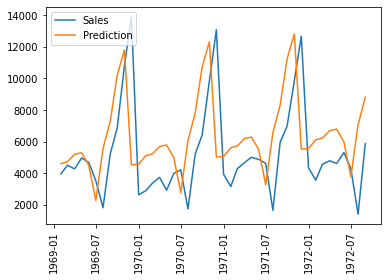

In [26]:
plt.plot(test, label ='Sales')
plt.plot(future_forecast, label = 'Prediction')
plt.xticks(rotation ='vertical')
plt.legend()
plt.show()

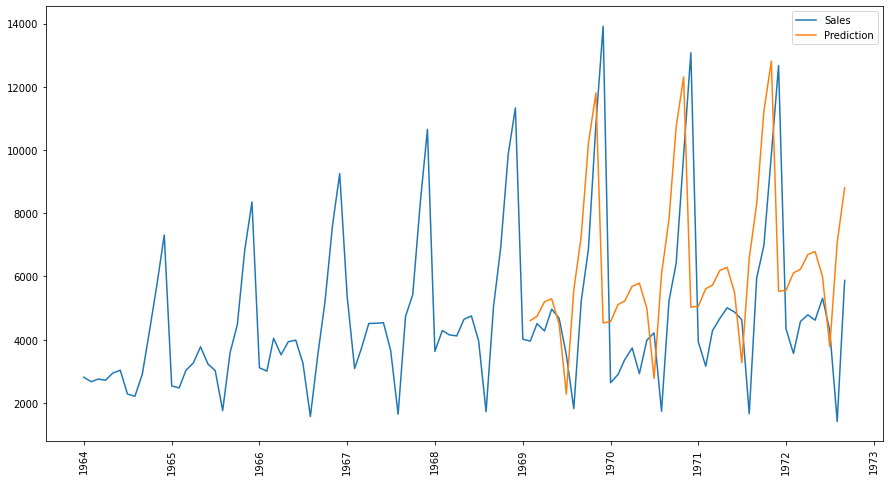

In [27]:
plt.figure(figsize=(15,8))
plt.plot(data, label ='Sales')
plt.plot(future_forecast, label = 'Prediction')
plt.xticks(rotation ='vertical')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
mae = mean_absolute_error(test, future_forecast[0:len(test)])
mae

2472.770331577999

In [30]:
test['Sale'].mean()

5252.409090909091

In [31]:
Error_percentage = (mae/test['Sale'].mean())*100
print(round(Error_percentage,2), '%')

47.08 %


In [32]:
future_forcast = stepwise_model.predict(n_periods=len(test)+9)
future_forcast

array([ 4604.92658245,  4739.92870562,  5198.82184737,  5293.21632259,
        4493.15784418,  2281.6491067 ,  5575.19882072,  7286.45301067,
       10215.58609937, 11807.24634567,  4533.03580531,  4572.64466733,
        5112.63346994,  5224.56247587,  5692.67195595,  5788.66031361,
        4990.2579255 ,  2774.56157144,  6072.43061264,  7806.036027  ,
       10736.11220527, 12311.47586124,  5031.66336796,  5057.72946164,
        5612.54224982,  5727.64007724,  6194.48380157,  6290.2532582 ,
        5491.62342556,  3276.50219142,  6573.77802379,  8304.31376016,
       11234.26041615, 12811.86221729,  5532.81908641,  5560.74512016,
        6113.52200814,  6228.18463517,  6695.20219617,  6791.00171629,
        5992.40312048,  3777.20290038,  7074.56020301,  8805.51752357,
       11735.48196793, 13312.77638613,  6033.62759237,  6061.29818521,
        6614.35468015,  6729.07707684,  7196.07076342,  7291.86615467,
        6493.26326885,  4278.07389655,  7575.42001019,  9306.31943112])

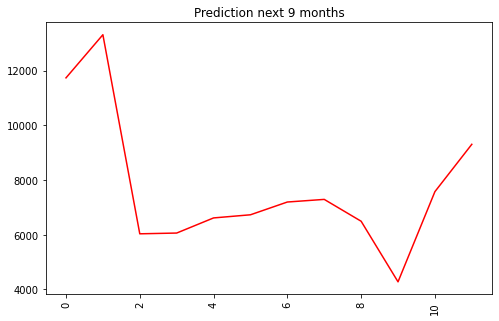

In [38]:
plt.figure(figsize=(8,5))
plt.plot(future_forcast[len(test):], color ='red')
plt.xticks(rotation = 'vertical')
plt.title("Prediction next 9 months")
plt.show()

In [39]:
future_forcast[len(test):]

array([11735.48196793, 13312.77638613,  6033.62759237,  6061.29818521,
        6614.35468015,  6729.07707684,  7196.07076342,  7291.86615467,
        6493.26326885,  4278.07389655,  7575.42001019,  9306.31943112])

In [42]:
months = pd.date_range('1972-10-01','1973-09-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()
months

['1972-10-01',
 '1972-11-01',
 '1972-12-01',
 '1973-01-01',
 '1973-02-01',
 '1973-03-01',
 '1973-04-01',
 '1973-05-01',
 '1973-06-01',
 '1973-07-01',
 '1973-08-01',
 '1973-09-01']

In [44]:
new_predict = pd.DataFrame({'DATE': months,
                           'Sale': future_forcast[len(test):]})
new_predict.head(9)

,DATE,Sale
0,1972-10-01,11735.481968
1,1972-11-01,13312.776386
2,1972-12-01,6033.627592
3,1973-01-01,6061.298185
4,1973-02-01,6614.354680
5,1973-03-01,6729.077077
6,1973-04-01,7196.070763
7,1973-05-01,7291.866155
8,1973-06-01,6493.263269


## Su dung phuong phap Holtwinter

In [62]:
model  = ExponentialSmoothing(train, seasonal ='mul',
                             seasonal_periods =12).fit()
pred = model.predict(start = test.index[0],
                    end = test.index[43])

c:\users\dell 7440\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dell 7440\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [63]:
test.index

DatetimeIndex(['1969-02-01', '1969-03-01', '1969-04-01', '1969-05-01',
               '1969-06-01', '1969-07-01', '1969-08-01', '1969-09-01',
               '1969-10-01', '1969-11-01', '1969-12-01', '1970-01-01',
               '1970-02-01', '1970-03-01', '1970-04-01', '1970-05-01',
               '1970-06-01', '1970-07-01', '1970-08-01', '1970-09-01',
               '1970-10-01', '1970-11-01', '1970-12-01', '1971-01-01',
               '1971-02-01', '1971-03-01', '1971-04-01', '1971-05-01',
               '1971-06-01', '1971-07-01', '1971-08-01', '1971-09-01',
               '1971-10-01', '1971-11-01', '1971-12-01', '1972-01-01',
               '1972-02-01', '1972-03-01', '1972-04-01', '1972-05-01',
               '1972-06-01', '1972-07-01', '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [64]:
test.index[43]

Timestamp('1972-09-01 00:00:00')

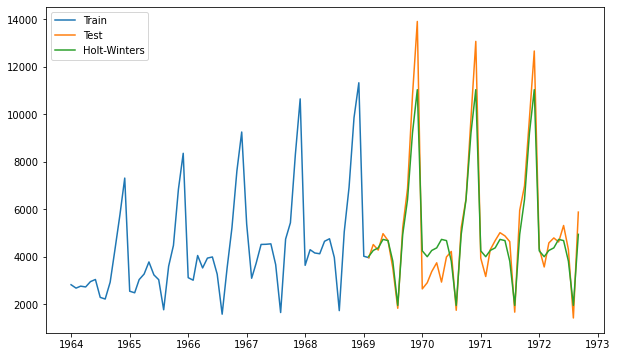

In [65]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label ='Train')
plt.plot(test.index, test, label ='Test')
plt.plot(pred.index, pred, label = 'Holt-Winters')
plt.legend(loc ='best')

In [66]:
import datetime
s = datetime.datetime(1972,10,1)
e = datetime.datetime(1973,9,1)
pred_test_next_12_month = model.predict(start = test.index[0], end =e)
pred_next_12_month = pred_test_next_12_month[14:,]
pred_next_12_month

1970-04-01     4369.243318
1970-05-01     4726.376719
1970-06-01     4675.986151
1970-07-01     3808.690055
1970-08-01     1943.514867
1970-09-01     4939.805148
1970-10-01     6407.559631
1970-11-01     9223.550918
1970-12-01    11039.985749
1971-01-01     4243.258484
1971-02-01     3997.245376
1971-03-01     4259.656800
1971-04-01     4369.243318
1971-05-01     4726.376719
1971-06-01     4675.986151
1971-07-01     3808.690055
1971-08-01     1943.514867
1971-09-01     4939.805148
1971-10-01     6407.559631
1971-11-01     9223.550918
1971-12-01    11039.985749
1972-01-01     4243.258484
1972-02-01     3997.245376
1972-03-01     4259.656800
1972-04-01     4369.243318
1972-05-01     4726.376719
1972-06-01     4675.986151
1972-07-01     3808.690055
1972-08-01     1943.514867
1972-09-01     4939.805148
1972-10-01     6407.559631
1972-11-01     9223.550918
1972-12-01    11039.985749
1973-01-01     4243.258484
1973-02-01     3997.245376
1973-03-01     4259.656800
1973-04-01     4369.243318
1

In [67]:
X = pd. Series(pred_next_12_month)
type(X)

pandas.core.series.Series

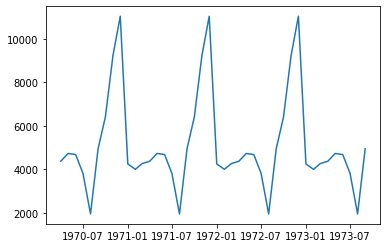

In [68]:
plt.plot(X.index, X.values)

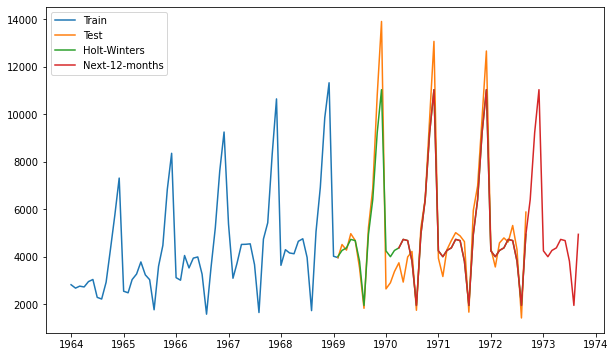

In [69]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.plot(X.index, X.values, label='Next-12-months')
plt.legend(loc='best')